In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


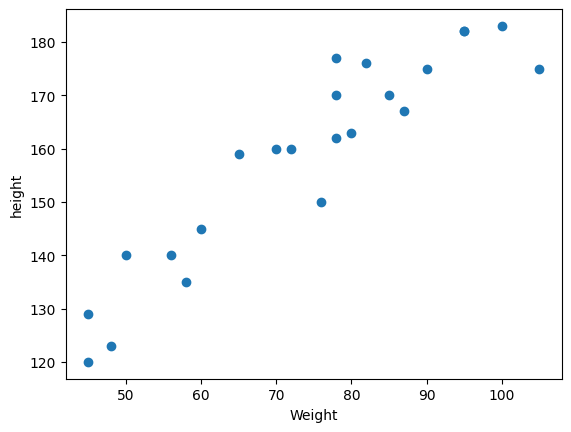

In [6]:
## scatter plot 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("height")
plt.show()

In [7]:
# finding correlaion
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


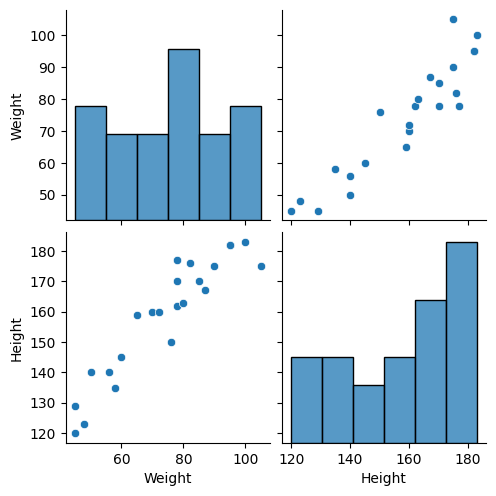

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [13]:
X=df[['Weight']]# independent feature should be in 2d array or a data frame
Y=df['Height']# dependent feature can be 1-dim

In [14]:
X.shape

(23, 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [16]:
X_train.shape

(17, 1)

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) #this will basically give z-score of the data points

In [ ]:
X_test=scaler.transform(X_test) # we use transform here so mean and standard deviation is not calc separately but used from training set due to data leakage


In [20]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [25]:
print(regression.coef_)
print(regression.intercept_)

[17.2982057]
156.47058823529412


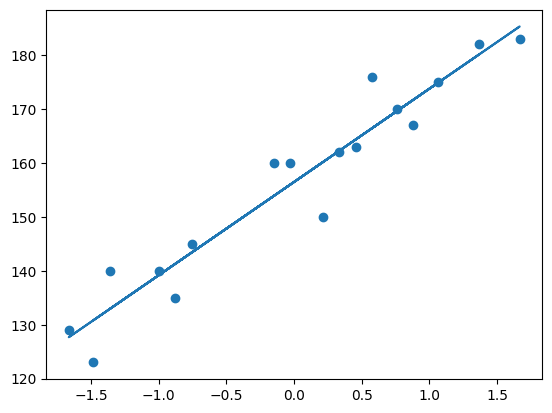

In [27]:
#plot the best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [30]:
Y_pred=regression.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [32]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,Y_pred)
print(r_score)

0.7360826717981276


In [33]:
# OLS TECHNIQUE
import statsmodels.api as sm
model= sm.OLS(Y_train,X_train).fit()

In [ ]:
prediction=model.predict(X_test)

In [40]:
model.summary()

e:\MACHINE LEARNING\env\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 22 Jun 2025   Prob (F-statistic):                       0.664
Time:                        19:25:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
regression.predict(scaler.transform([[72]]))

e:\MACHINE LEARNING\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])